In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns



# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [2]:
df = pd.read_csv('recipient_totals.csv')

# DATA UNDERSTANDING

In [3]:
df.head()

,period,programme,scheme,scheme_description,basis,recipients
0,2014Q1,Children,BSCFA,Back To School Clothing And Footwear,Social Assistance,137
1,2014Q1,Children,CB,Child Benefit,Social Assistance,623739
2,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,48327
3,2014Q1,Children,ORC,Guardians Payment (Contributory),Social Insurance,487
4,2014Q1,Children,ORNC,Guardians Payment (Non-Contributory),Social Assistance,221


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              1647 non-null   object
 1   programme           1647 non-null   object
 2   scheme              1647 non-null   object
 3   scheme_description  1647 non-null   object
 4   basis               1647 non-null   object
 5   recipients          1647 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 77.3+ KB


In [5]:
df.shape

(1647, 6)

In [6]:
df.describe()

,recipients
count,1647.000000
mean,57911.921676
std,119336.796418
min,1.000000
25%,718.000000
50%,7197.000000
75%,62312.500000
max,734259.000000


In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

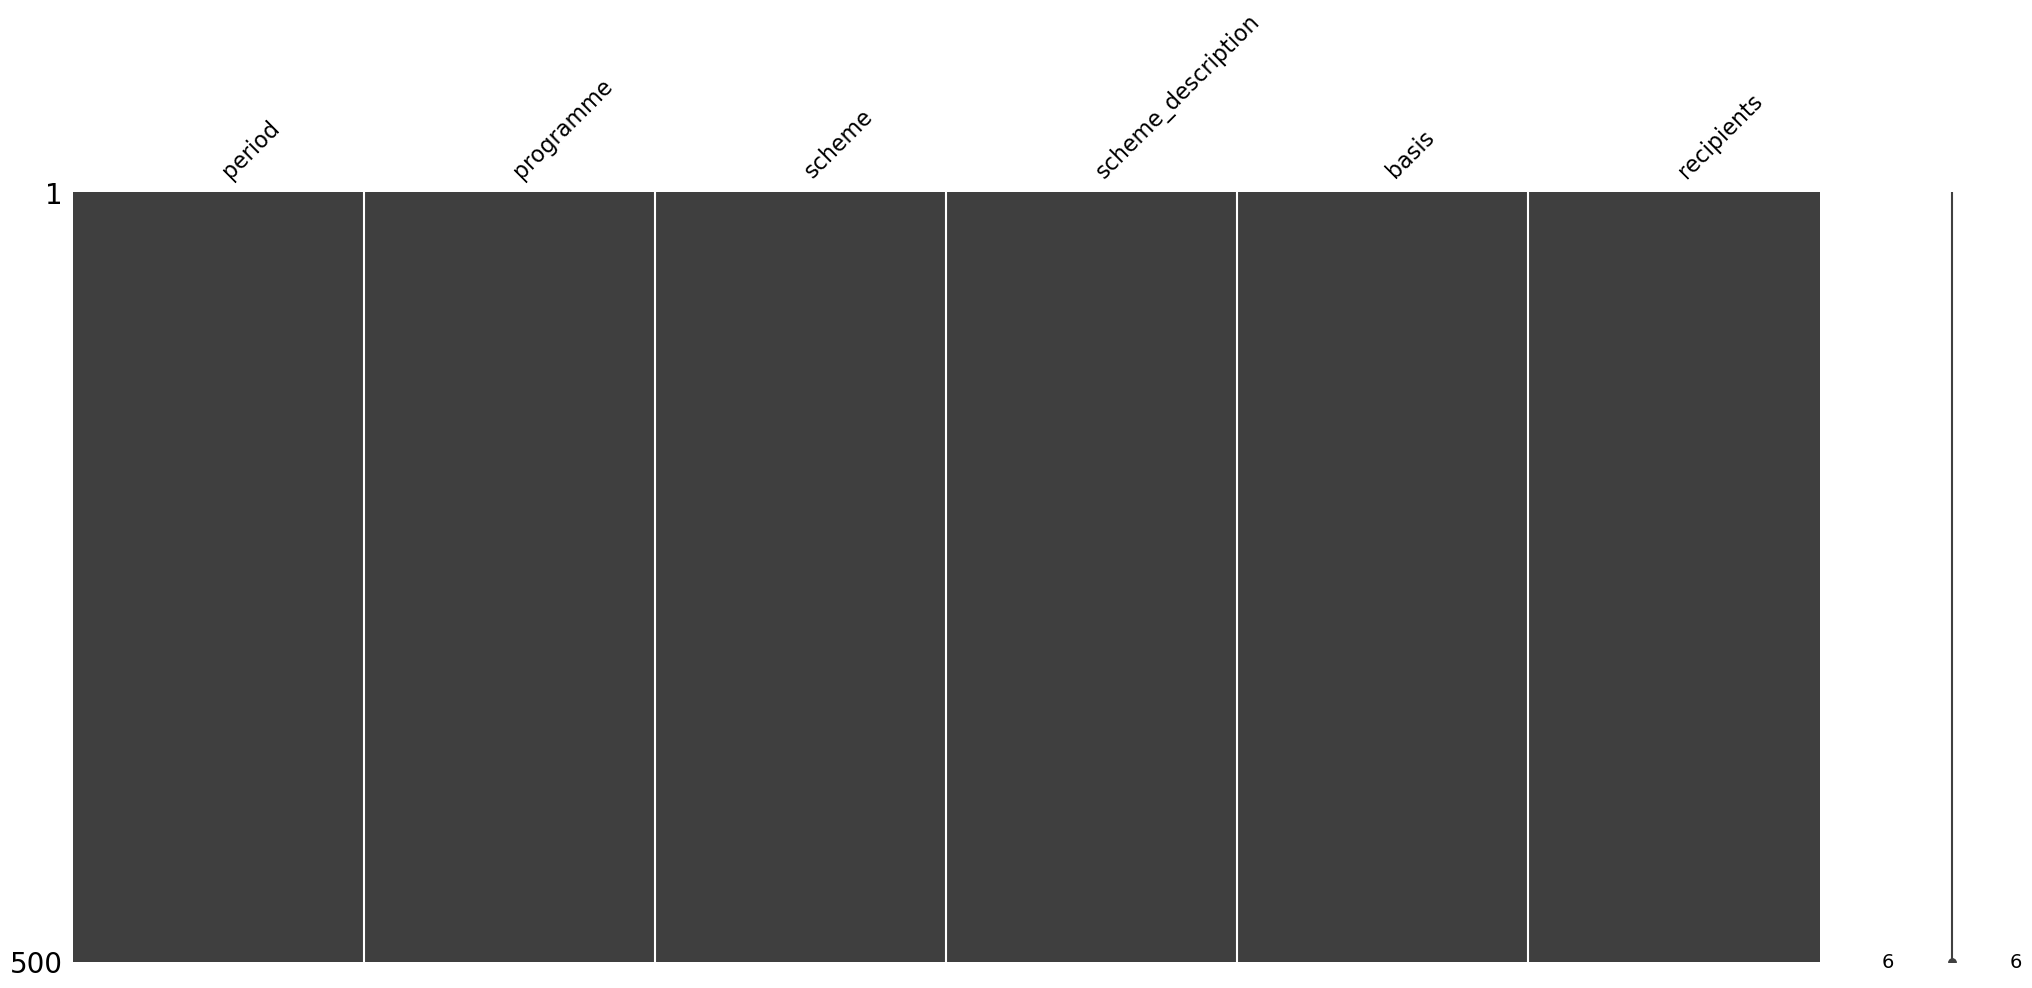

In [9]:
ax = msno.matrix(df.sample(500))

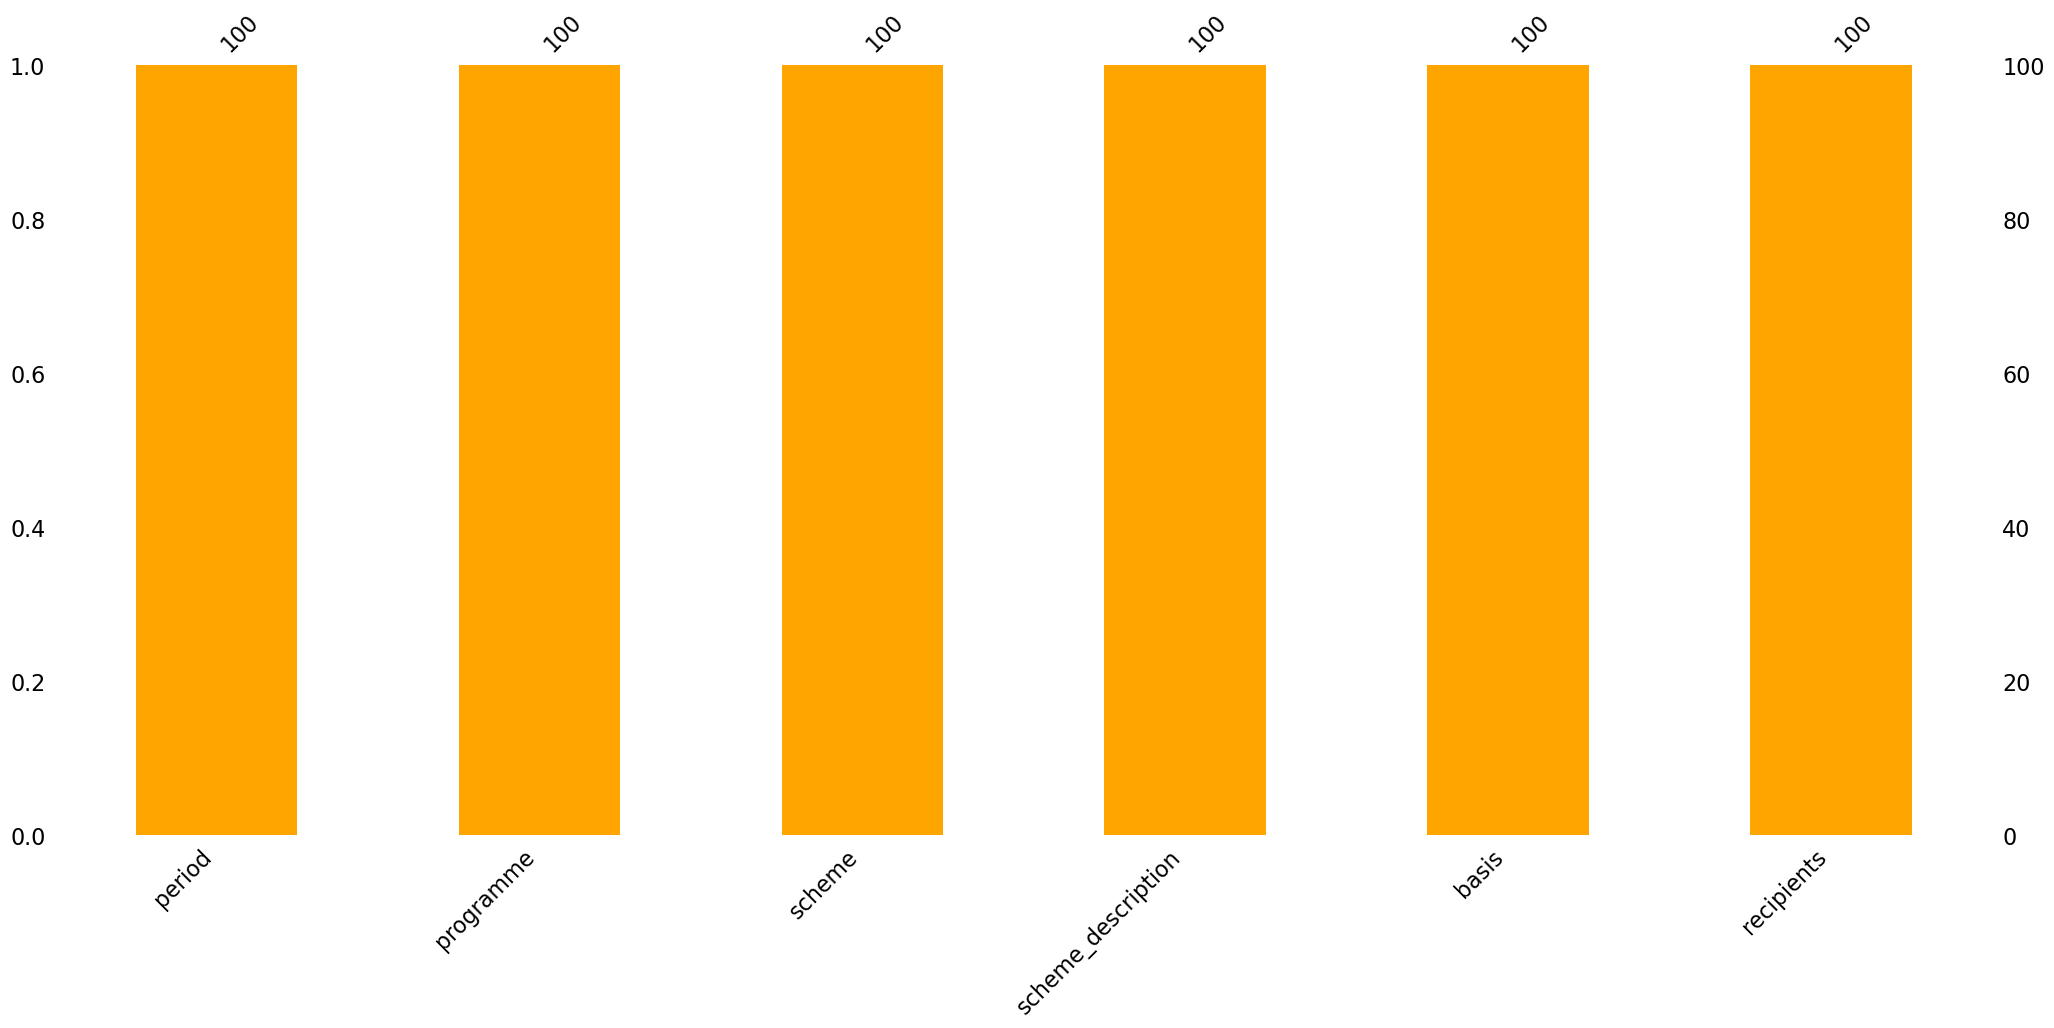

In [10]:
ax = msno.bar(df.sample(100), color='orange')

Em resumo, o gráfico de barras gerado por este código mostra visualmente a presença de valores nulos em diferentes colunas do DataFrame new_df. Cada barra vertical representa uma coluna, e a altura da barra indica a proporção de valores nulos naquela coluna. Se a barra estiver completamente preenchida, significa que não há valores nulos nessa coluna.

Esse tipo de visualização é útil para identificar padrões de valores nulos e entender quais colunas têm mais dados ausentes.

# DATA PREPARATION

In [11]:
df.head()

,period,programme,scheme,scheme_description,basis,recipients
0,2014Q1,Children,BSCFA,Back To School Clothing And Footwear,Social Assistance,137
1,2014Q1,Children,CB,Child Benefit,Social Assistance,623739
2,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,48327
3,2014Q1,Children,ORC,Guardians Payment (Contributory),Social Insurance,487
4,2014Q1,Children,ORNC,Guardians Payment (Non-Contributory),Social Assistance,221


In [12]:
# Select just "working age" in the columns programme
new_df = df[df['programme'].str.contains('Working Age Employment Supports', case=True)] #drop some row

In [13]:
new_df.head()

,period,programme,scheme,scheme_description,basis,recipients
24,2014Q1,Working Age Employment Supports,BTW,Back To Work Scheme,Social Assistance,11888
25,2014Q1,Working Age Employment Supports,PCB,Partial Capacity Benefit,Social Insurance,1411
26,2014Q1,Working Age Employment Supports,STEA,Short Term Enterprise,Social Assistance,50
66,2014Q2,Working Age Employment Supports,BTW,Back To Work Scheme,Social Assistance,12177
67,2014Q2,Working Age Employment Supports,PCB,Partial Capacity Benefit,Social Insurance,1526


In [14]:
new_df = new_df.drop(columns = ['scheme', 'scheme_description', 'basis', 'programme'])
new_df.head()

,period,recipients
24,2014Q1,11888
25,2014Q1,1411
26,2014Q1,50
66,2014Q2,12177
67,2014Q2,1526


# Label ENcoder

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
new_df.period = le.fit_transform(new_df.period)  #trocar letrar por números

In [22]:
def set_header_font():
    return [dict(selector="th", props=[("font-size", "14pt")])]

In [23]:
new_df.describe(percentiles=[.01,.99]).transpose().style.format('{:.2f}').\
                set_properties(**{'font-size': '12pt'}).set_table_styles(set_header_font())

,count,mean,std,min,1%,50%,99%,max
period,133.00,19.54,10.53,0.00,0.00,21.00,36.00,36.00
recipients,133.00,3180.14,4216.39,1.00,1.32,1791.00,13853.12,13876.00


# Model Building and Evaluation

start decision tree

In [24]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [25]:
# Putting feature variable to X
X = new_df.drop('recipients', axis=1)

# Putting response variable to y
y = new_df['recipients']

In [26]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,period
1397,31
1207,27
1584,35
408,9
109,2


In [27]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       0.0
          48       0.00      0.00      0.00       0.0
          55       0.00      0.00      0.00       1.0
          60       0.00      0.00      0.00       0.0
          68       0.00    

In [29]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.0


[Text(0.5189393939393939, 0.9166666666666666, 'x[0] <= 20.5\ngini = 0.987\nsamples = 93\nvalue = [1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(0.3106060606060606, 0.75, 'x[0] <= 15.5\ngini = 0.974\nsamples = 46\nvalue = [0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1\n1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1\n1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[0] <= 7.5\ngini = 0.969\nsamples = 34\nvalue = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1\n1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1\n1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

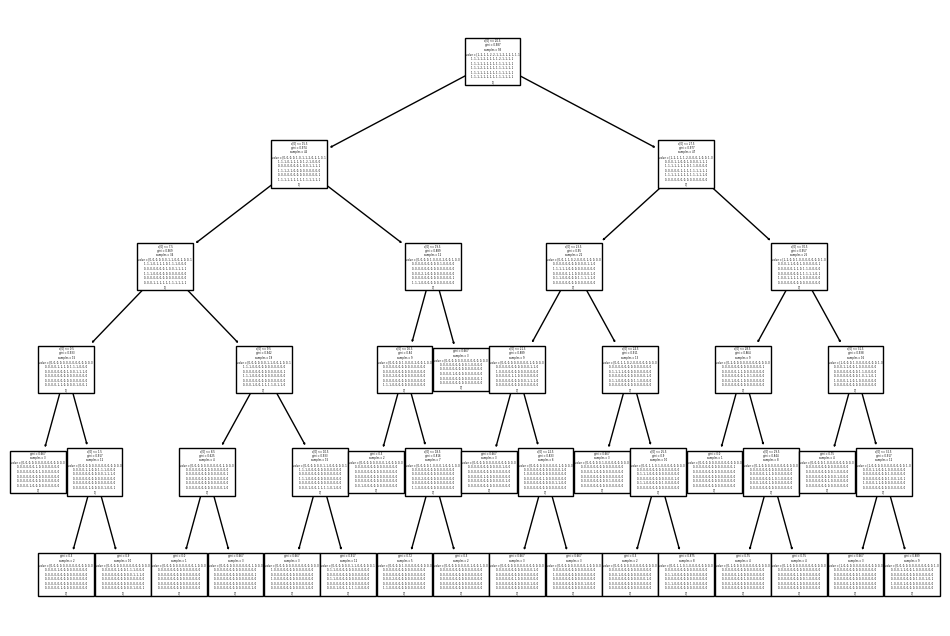

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default)

# Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5),
    'criterion': ["entropy", "gini"]
}

n_folds = 2

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 5)},
             verbose=1)

In [32]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.0,0.0,entropy,0,"{'criterion': 'entropy', 'max_depth': 0}",NaN,NaN,NaN,NaN,9
1,0.000000,0.000000,0.0,0.0,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.000000,0.021739,0.010870,0.010870,3
2,0.007813,0.007813,0.0,0.0,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.021277,0.043478,0.032377,0.011101,2
3,0.000000,0.000000,0.0,0.0,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.063830,0.043478,0.053654,0.010176,1
4,0.000000,0.000000,0.0,0.0,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.000000,0.000000,0.000000,0.000000,8
5,0.000000,0.000000,0.0,0.0,gini,0,"{'criterion': 'gini', 'max_depth': 0}",NaN,NaN,NaN,NaN,9
6,0.000000,0.000000,0.0,0.0,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.000000,0.021739,0.010870,0.010870,3
7,0.007812,0.007812,0.0,0.0,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.000000,0.021739,0.010870,0.010870,3
8,0.000000,0.000000,0.0,0.0,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.000000,0.021739,0.010870,0.010870,3
9,0.000000,0.000000,0.0,0.0,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.000000,0.021739,0.010870,0.010870,3


In [33]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.05365402405180388
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [34]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.05365402405180388

# Running the model with best parameters obtained from grid searc

In [35]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 500,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=500)

In [36]:
# accuracy score
clf_gini.score(X_test,y_test)

0.0

[Text(0.4901315789473684, 0.95, 'x[0] <= 20.5\ngini = 0.987\nsamples = 93\nvalue = [1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(0.29605263157894735, 0.85, 'x[0] <= 15.5\ngini = 0.974\nsamples = 46\nvalue = [0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1\n1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1\n1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(0.14473684210526316, 0.75, 'x[0] <= 7.5\ngini = 0.969\nsamples = 34\nvalue = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1\n1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1\n1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 1, 1, 1, 1, 

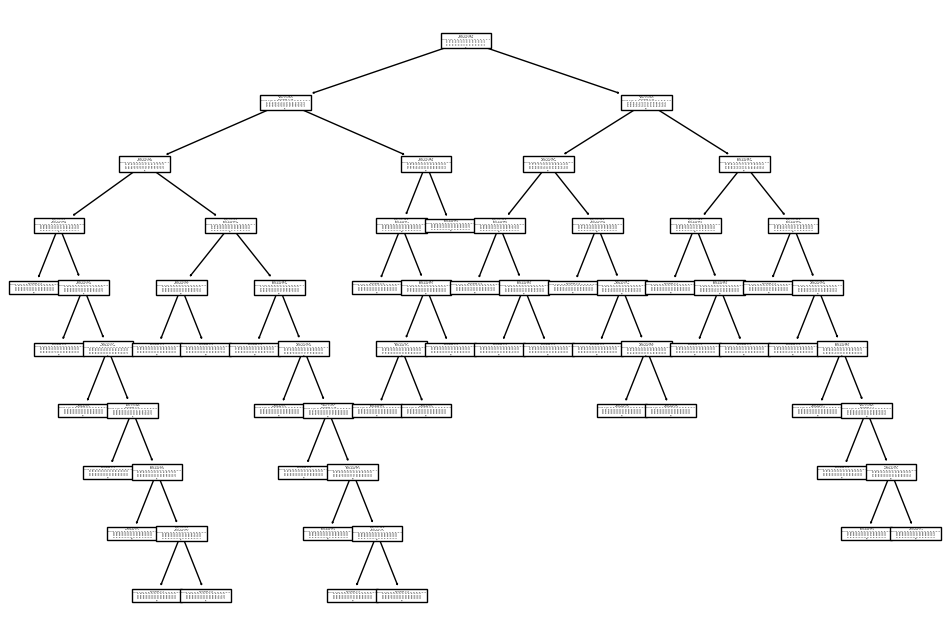

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [38]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 500,
                                  max_depth=3, 
                                  min_samples_leaf=6,
                                  min_samples_split=6)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.025


# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

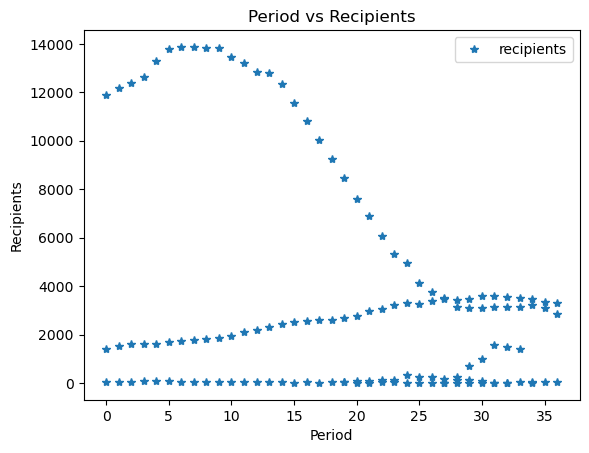

In [40]:
new_df.plot(x='period', y='recipients', style='*')
plt.title('Period vs Recipients')
plt.xlabel('Period')
plt.ylabel('Recipients')
plt.show()

In [41]:
# Split the dataset into X and y columns
X = new_df.iloc[:, :-1].values            # Independent variables
y = new_df.iloc[:, 1].values              # Dependent variable

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
import numpy as np

In [ ]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

Modelo inadequado. 

Um 
�
2
R 
2
  negativo pode ocorrer quando o modelo é pior do que um modelo simples que apenas prediz a média da variável dependente para todos os pontos de dados. Isso sugere que o modelo não está conseguindo capturar a relação entre as variáveis independentes e dependentes.

In [ ]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

In [ ]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred

In [ ]:
# Show the plotted values
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

# Gaussian Naive Bayes and Support Vector Machin

In [42]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [43]:
import math
math.exp(1), math.exp(2), math.exp(3), 
math.exp(-1), math.exp(-2), math.exp(-3)

(0.36787944117144233, 0.1353352832366127, 0.049787068367863944)

In [44]:
# Spliting the dataset into independent and dependent variables

# Independent variables
X = new_df.iloc[:,:4].values

# Dependent variables
y = new_df['recipients'].values

print(X, y)

[[    0 11888]
 [    0  1411]
 [    0    50]
 [    1 12177]
 [    1  1526]
 [    1    47]
 [    2 12405]
 [    2  1606]
 [    2    55]
 [    3 12631]
 [    3  1608]
 [    3    68]
 [    4 13289]
 [    4  1621]
 [    4    71]
 [    5 13794]
 [    5  1684]
 [    5    60]
 [    6 13864]
 [    6  1723]
 [    6    58]
 [    7 13876]
 [    7  1791]
 [    7    48]
 [    8 13830]
 [    8  1826]
 [    8    25]
 [    9 13819]
 [    9  1869]
 [    9    25]
 [   10 13476]
 [   10  1955]
 [   10    32]
 [   11 13212]
 [   11  2102]
 [   11    41]
 [   12 12848]
 [   12  2166]
 [   12    39]
 [   13 12814]
 [   13  2290]
 [   13    31]
 [   14 12353]
 [   14  2452]
 [   14    19]
 [   15 11559]
 [   15  2526]
 [   15    18]
 [   16 10798]
 [   16  2557]
 [   16    21]
 [   17 10046]
 [   17  2601]
 [   17    16]
 [   18  9234]
 [   18  2601]
 [   18    26]
 [   19  8454]
 [   19  2681]
 [   19    21]
 [   19    28]
 [   20  7589]
 [   20  2780]
 [   20    18]
 [   20    60]
 [   21  6911]
 [   21  2

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

# Display rows and columns
X_train.shape, X_test.shape

((106, 2), (27, 2))

In [46]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform
X_train = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test = sc.transform(X_test)

print(X_train, X_test)

[[ 0.51579682  0.20623877]
 [ 0.61239481  0.03056535]
 [ 0.99878678 -0.80058037]
 [-0.45018309 -0.79666564]
 [-1.22296702 -0.78932553]
 [ 1.38517874 -0.79005954]
 [-0.54678108 -0.79642097]
 [ 0.32260084 -0.76852853]
 [ 1.57837472 -0.10742882]
 [ 0.03280686 -0.79666564]
 [-1.51276099 -0.78369811]
 [-1.80255497 -0.42770252]
 [-1.22296702 -0.36286483]
 [ 0.7089928   0.06114916]
 [-0.64337907 -0.79348493]
 [ 1.48177673  0.02126787]
 [-1.02977104  2.58003205]
 [ 0.99878678  0.07264868]
 [-0.3535851   1.84088244]
 [-1.70595698  2.23406795]
 [ 0.22600285 -0.79593163]
 [-1.51276099  2.45035668]
 [ 0.51579682 -0.00344385]
 [-1.51276099 -0.40445882]
 [ 1.28858075 -0.03720838]
 [ 0.32260084 -0.01372001]
 [ 0.99878678 -0.55468651]
 [-0.06379113 -0.14510808]
 [-0.06379113 -0.79421894]
 [ 0.90218879  0.050873  ]
 [-0.73997706 -0.79152756]
 [ 0.12940486 -0.07757902]
 [-0.3535851  -0.79593163]
 [-1.89915296 -0.45583962]
 [-0.64337907 -0.24077425]
 [ 0.99878678 -0.78443212]
 [-1.60935898 -0.78443212]
 

In [48]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [49]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[ 1484    60 13876    60  2166  3361 12848    21     3    60  2601    60
    68  1826    21    16  1007    16 12177     1     3  3524    21    68
 13289  6911     3]


In [50]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:30,:]

array([[ 1549,  1484],
       [   47,    60],
       [13864, 13876],
       [   58,    60],
       [ 2102,  2166],
       [ 3086,  3361],
       [12814, 12848],
       [   32,    21],
       [    9,     3],
       [   50,    60],
       [ 2601,  2601],
       [   41,    60],
       [  105,    68],
       [ 1869,  1826],
       [   26,    21],
       [   17,    16],
       [  717,  1007],
       [   17,    16],
       [11888, 12177],
       [    2,     1],
       [    7,     3],
       [ 3469,  3524],
       [   25,    21],
       [  126,    68],
       [13794, 13289],
       [ 7589,  6911],
       [    2,     3]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.037037037037037035


<Axes: >

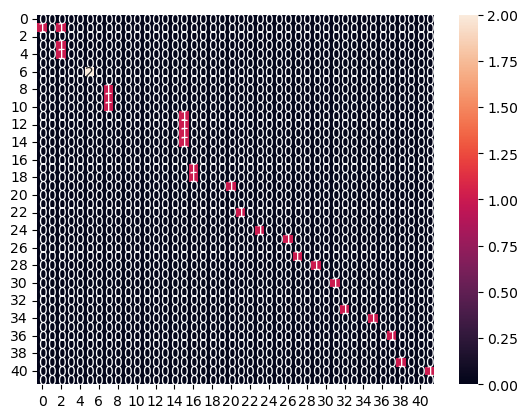

In [52]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print(cm, cm.shape)

In [57]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Calculate the score using cross validation method
cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 100).mean()

ValueError: n_splits=100 cannot be greater than the number of members in each class.

In [ ]:
new_df.head()

In [ ]:
new_df['period'].hist(figsize = (20,10), xrot = 90, bins = 100)
plt.title('Working Age Support', fontsize = 18, pad = 15, fontweight = 'bold');
plt.xlabel('Period', fontsize=14)
plt.ylabel('Recipient', fontsize=14)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
plt.plot(new_df)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Recipient', fontsize=14)
plt.title('Working Age Support', fontsize = 18, pad = 15, fontweight = 'bold')
plt.show();

# one hot